# THE BASICS

## Tensor Orders


1. $1^{st}$-Order Tensors - Vectors

    A $1^{st}$-Order Tensor is either a row or column vector. We often see it denoted as having shape of either $\mathbb{R}^{Mx1}$ or $\mathbb{R}^{1xN}$. Here, M dictates the number of rows (elements) in the column vector. N dictates the number of columns (elements) in the row vector. $\mathbb{R}$ represents the overall state of the $1^{st}$-Order tensor. It means that the tensor is constructed of all real values and is in the shape of {M x 1} or {1 x N}.
    
    $$
        A = 
        \begin{bmatrix}
        1 & 2 & 3
        \end{bmatrix}
    $$

    Where **A** is a 1 x 3 Vector

    $$
        B = 
        \begin{bmatrix}
        4 \\ 5 \\ 6
        \end{bmatrix}
    $$

    Where **B** is a 3 x 1 matrix.


2. $2^{nd}$-Order Tensors - Matrices

    A $2^{nd}$-Order Tensor is a matrix. Throughout the tutorial, we will only deal with real numbers. Therefore if **A** is a $2^{nd}$-Order Tensor having **M** rows and **N** columns, then A $\in \mathbb{R}^{MxN}$.

    $$
      A = 
      \begin{bmatrix}
      1 & 2 & 3 \\
      4 & 5 & 6 \\
      7 & 8 & 9
      \end{bmatrix}
    $$

    $ A \in \mathbb{R}^{3x3} $

3. $3^{rd}$-Order Tensors - Cubes

    A $3^{rd}$-Order Tensors can be thought of as a cube or stacked matrices. Therefore if **A** is a $3^{rd}$-Order Tensor having K instances of matrices of shape I rows and J columns, it would be denoted as **A** $\in \mathbb{R}^{IxJxK}$

    $$
        A = 
        \begin{bmatrix}
            \begin{bmatrix}
                1 & 2 & 3 \\
                4 & 5 & 6 \\
                7 & 8 & 9 \\
                10 & 11 & 12
            \end{bmatrix}
            \begin{bmatrix}
                11 & 12 & 13 \\
                14 & 15 & 16 \\
                17 & 18 & 19 \\
                20 & 21 & 22
            \end{bmatrix}
            \begin{bmatrix}
                31 & 32 & 33 \\
                34 & 35 & 36 \\
                37 & 38 & 39 \\
                40 & 41 & 42
            \end{bmatrix}
        \end{bmatrix}
    $$

    
       $$ A \in \mathbb{R}^{4x3x3}$$
    

## Factorization


To understand the premise of this paper (this method) we first need to get an understanding and intrinsic level of intuition for factorization. 

### Example 1
Let's start with simple number factorization. If I give the number 24 and ask for the lowest factors possible, we can see that those factors are 3 and 2. This means that as long as I have both 3 and 2, I can reproduce 24. These are the most important building blocks of 24.

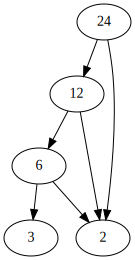

In [1]:

from graphviz import Digraph
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('a', '24')
dot.node('b', '12')
dot.node('c', '2')
dot.node('d','6')
dot.node('e','3')

# Add edges
dot.edges(['ab', 'ac', 'bd', 'bc', 'de', 'dc'])

# Visualize the graph
dot

### Example 2

If **X** is defined as the set of numbers in:

$$
\{1,3,6,9,18,27,36,54,81,162\}
$$

We can actually store all the information we need about this set in the form of:

$$
\{1,3,6,9\}
$$

And this is becuase as long as we have these 4 numbers, we can create every value in **X**.


### Example 3


For a more relevant example. If the matrix **A** $\in \mathbb{R}^{4x4}$ is defined as:
$$
A = 
\begin{bmatrix}
2 & 12 & 6 & 18 \\
7 & 42 & 21 & 63 \\
4 & 24 & 12 & 36 \\
1 & 6 & 3 & 9
\end{bmatrix}
$$

We can actually find two vectors that encompass all the information in *A* but in a reduced form. Without formal proof, the two vectors:

$$
v1 = 
\begin{bmatrix}
2 \\ 7 \\ 4 \\ 1
\end{bmatrix}

, 

v2 = 
\begin{bmatrix}
1 \\ 6 \\ 3 \\ 9
\end{bmatrix}
$$

Will reproduce **A** when the outer product is taken between v1 and v2:

$$
v1 \otimes v2 = 

\begin{bmatrix}
2 \\ 7 \\ 4 \\ 1
\end{bmatrix}
\otimes
\begin{bmatrix}
1 & 6 & 3 & 9
\end{bmatrix}
=
\begin{bmatrix}
2*1 & 2*6 & 2*3 & 2*9 \\
7*1 & 7*6 & 7*3 & 7*9 \\
4*1 & 4*6 & 4*3 & 4*9 \\
1*1 & 1*6 & 1*3 & 1*9
\end{bmatrix}
=
\begin{bmatrix}
2 & 12 & 6 & 18 \\
7 & 42 & 21 & 63 \\
4 & 24 & 12 & 36 \\
1 & 6 & 3 & 9
\end{bmatrix}
$$


### A Note on Rank

You'll notice that v1 and v2 are both 1-D vectors that when the outer product is taken, creates a 4x4 matrix **A**. Since both of these vectors a matrices of 1 column (or row), it is said that the resultant matrix **A** is a ***RANK 1*** matrix. Now, depending on what source or post you read, you'll get conflicting information on what the rank of a tensor or matrix is. For example, if we read the definition for rank of a tensor on Tensorflow's site, it says the rank is simply the number of dimensions of the tensor:

<img src='https://scratchpaper.s3.amazonaws.com/tensor_topic_analysis/tf_rank.png'>



Yet this is inaccurate in the context of this paper. Wikipedia actually gives a better definition of tensor rank

<img src='https://scratchpaper.s3.amazonaws.com/tensor_topic_analysis/rank_wiki.png'>

> The rank of a tensor is the minimum number of simple tensors that sum to T

I bring this up because it is paramount we understand the meaning of rank in the context of this paper. This frist definition (from Tensorflow) you will actually see in a multitude of place including Wolfram. 



#### Problem with Rank as Dimensions

As seen in the previous example with matrix

$$
A = 
\begin{bmatrix}
2 & 12 & 6 & 18 \\
7 & 42 & 21 & 63 \\
4 & 24 & 12 & 36 \\
1 & 6 & 3 & 9
\end{bmatrix}
$$

The basic definition would have you believe the rank of this matrix is 2 since there are two dimensions {rows} and {columns}. But we saw that **A** actually decomposes to **v1** and **v2**, each a column (or row) vector. Since A is a linear combination of single column vectors, it is rank is actually 1. 


To demonstrate a rank 2 matrix, if we had matrix **B**

$$
B = 
\begin{bmatrix}
10 & 30 & 44 & 31 \\
16 & 44 & 60 & 42 \\
21 & 54 & 69 & 48 \\
21 & 44 & 43 & 29
\end{bmatrix}
$$

Without formal proof, **B** could decompose to **v1** and **v2** of:

$$
B =
\begin{bmatrix}
1 & 6 \\
2 & 8 \\
3 & 9 \\
4 & 5
\end{bmatrix}_{v1}
\otimes
\begin{bmatrix}
4 & 6 & 2 & 1 \\
1 & 4 & 7 & 5
\end{bmatrix}_{v2}
=
 \sum_{r=1}^R v_1 \otimes v_2 = 
\begin{bmatrix}
1 \\
2 \\
3 \\
4
\end{bmatrix}
\otimes
\begin{bmatrix}
4 & 6 & 2 & 1
\end{bmatrix}
+
\begin{bmatrix}
6 \\
8 \\
9 \\
5
\end{bmatrix}
\otimes
\begin{bmatrix}
1 & 4 & 7 & 5
\end{bmatrix}
=
\begin{bmatrix}
10 & 30 & 44 & 31 \\
16 & 44 & 60 & 42 \\
21 & 54 & 69 & 48 \\
21 & 44 & 43 & 29
\end{bmatrix}
$$

Because **B** is a linear combination of **v1** and **v2**, each matrices consisting of 2 column-vectors, the rank of **B** is two. In this instance, it just happens to be a rank value that matches the number of dimensions of **B**. But the existence of 2 dimensions is not what gives this matrix a rank of 2

## Decomposition of Matrices

So how do we get to this v1 and v2 if we are only given the final matrix **B**. Well, there's multiple ways to go about it. Too many to actually cover here, but I want to at least cover the basics and give an idea. Let's switch up some notation. Instead of v1 and v2, let's denote the decomposed matrices as H and W. H (v1) is for the decomposed matrix with the column vectors and W (v2) is the matrix with row vectors as seen above. We essentially are trying some H and W such that their outer product either equals *B* or gets very close. More concretely

$$
B = HW
$$

If we can find the perfect H and W, then we have it such that 

$$ B - HW = 0$$

Finding the perfect H and W is a challenge, so we want to find some that keeps the error as low as possible. In other words, we want to find H and W that minimizes the error between B and the outer product of H and W

$$
min_{HW} \text{   }\begin{bmatrix}B - HW \end{bmatrix}
$$

This optimization isn't very nice. Something we can do to make our lives easier is to minimize the squared error. If that doesn't ring some bells, it should. Because this has turned into solving a *Least Squares* problem

$$
min_{HW} \text{   }\begin{bmatrix}B - HW \end{bmatrix}^2
$$

By minimizing the squared error, we have turned the objective function into a convex curve. From calculus, we know the minimum of a convex curve is where the derivative equals 0

$$
min_{HW} \text{   }\begin{bmatrix}B - HW \end{bmatrix}^2 => \frac{d}{dHW} \begin{bmatrix}B - HW \end{bmatrix}^2 = 0
$$

That derivative shouldn't look right to you. We want to take the derivative of the objective function, but there are two unknowns, H and W. We have two unknowns and one equation. We are faced with an underdetermined system. A ubiqutious way to solve this least squares problem is by employing a method called alternating least squares. Since we have two unknowns, we first fix one of the unkonwns and model it as a constant. We then take the derivative of the objective function with respect to the non fixed variable, set it euqal to 0 and solve. We then hold that variable fixed and take the derivative of the fucntion with respect to the previously held fixed variable. We alternate back and forth until we converge to a solution. Hence **Alternating Least Squares** or **ALS**

### Partial Derivatives

$$
\frac{\partial}{\partial H} \begin{bmatrix} B - HW \end{bmatrix}^2 \\
= 2\begin{bmatrix} B - HW \end{bmatrix} * W \\
= 2BW - 2HW^TW
$$

Setting it equal to 0 and solving for H yields

$$
0 = 2BW - 2HW^TW \\
HW^TW = BW \\
\boxed{H = (W^TW)^{-1}BW}
$$

We can do the same thing when solving for W after taking the partial with respect to W. It's the same as above with just the variables switched

$$
\boxed{W = (H^TH)^{-1}BH}
$$


#### ALS Algorithm
* **inputs:** B, rank, iterations
* **output:** H, W

$$
i,j = shape(B) \\
\text{initialize  } W \in \text{random(}\mathbb{R}^{\text{rank x i}}) \\
\text{for iter } = 1,2, \text{... iterations: do }\\
H := (WW^T)^{-1}WB \\
W := (H^TH)^{-1}HW^T
$$

In [1]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

def als(B, rank, iters, negative=False):
    #intialize U
    #shape should be rank x M[rows]
    W = np.random.random((rank, B.shape[0]))

    W = -1 * W if negative else W
    
    #iterate
    for _ in range(iters):
        
        #hold U constant and update V
        H = np.linalg.pinv(W@W.T) @ (W @ B)
        
 
        #hold V constant and update U
        W = np.linalg.pinv(H @ H.T) @ (H @ B.T)

    return H,W

In [2]:
v1 = np.array([[1,2,3,4],[6,8,9,5]])
v2 = np.array([[4,6,2,1], [1,4,7,5]])
B = v1.T @ v2

B

array([[10, 30, 44, 31],
       [16, 44, 60, 42],
       [21, 54, 69, 48],
       [21, 44, 43, 29]])

In [3]:
h,w = als(B, 2, 10, True)

In [4]:
h

array([[ -5.22793603, -26.00759166, -49.84475583, -35.82179049],
       [-24.46411648, -44.3406789 , -32.10776912, -20.64058707]])

So we can see that the ALS method works. However there is one caveat, matrix decomposition does not guarantee uniqueness. We can see this in that there's nothing stopping **w** and **h** from being negative. If both are negative, we will still arrive at the original **B** matrix. This is problematic for 2 reasons:

1. Hard to have confidence in an anlysis where there is potentially no statistical repeatability
2. How do you interpret a negative value?

To combat 2. - we can force constraints on our optimization for all positive values. Hence NMF or non-negative matrix factorization. There's multiple optimizaiton techniques that force $H\geq0$ and $W\geq0$:


1. Multiplicative update rule
2. alternating non-negative least squares
3. hierarchical alternating least squares
4. orthogonal NMF


In [5]:
def _initialize(m,n,rank):

    H = np.random.random((m,rank))
    W = np.random.random((n,rank))

    return H,W

def MUR(M, d, iters, tol=1e-3):
    '''
    Based off of Lee and Seung's 
    "Algorithms for Non-negative Matrix Factorization"
    Paper

    https://papers.nips.cc/paper/2000/file/f9d1152547c0bde01830b7e8bd60024c-Paper.pdf


    Alternative

    "Fast Local Algorithms for Large Scale Nonnegative Matrix and
    Tensor Factorizations"

    https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.214.6398&rep=rep1&type=pdf
    '''

    m,n=M.shape
    
    H,W = _initialize(m,n,d)

    H_old = H.copy()
    W_old = W.copy()

    errors = []

    for _ in range(iters):
        W = _update_W(M, W, H)
        H = _update_H(M, W, H)

        H_tol = np.linalg.norm(H - H_old)
        W_tol = np.linalg.norm(W - W_old)

        err = reconstruction_error(M, H, W)
        errors.append(err)

        if  err <= tol:
            return H,W, errors

        if H_tol <= tol and W_tol <= tol:
            return H,W, errors

        

        H_old = H.copy()
        W_old = W.copy()
        
    
    return H,W, errors



def _update_W(M, W, H):
    
    # M => (4x2)
    # W => (2x3)
    # H => (4x3)

    MH = M.T@H # => (2x3)
    HH = H.T@H # => (3x3)
    WHH = W@HH # => (2x3)

    MH_WHH = MH / WHH

    W_MH_WHH = W * MH_WHH

    return W_MH_WHH


def _update_H(M, W, H):
    # M => (4x2)
    # W => (2x3)
    # H => (4x3)

    MW = M@W # => (4x3)
    WW = W.T@W # => (3x3)
    HWW = H@WW # => (4x3)

    MW_HWW = MW / HWW # => (4x3)

    H_MW_HWW = H * MW_HWW # => (4x3)

    return H_MW_HWW


def reconstruction_error(M, H, W):
    reconstruction = H@W.T

    error = M -reconstruction

    error = np.linalg.norm(error, ord=2)

    return error

In [6]:
test = np.random.randint(0,100, size=(4,3))

In [7]:
h,w, e = MUR(test, 3, 100)

In [8]:
print(f'{h@w.T}\n\n{test}')

[[95.5241356  79.5599198  92.00840051]
 [81.32247144 44.25689364  2.58050416]
 [ 6.79118927 16.19615234 25.33268472]
 [16.98329209  3.4454473  90.09799765]]

[[96 79 92]
 [81 45  0]
 [ 0 18 26]
 [18  1 90]]


In [9]:
def direct_NMF(T, rank, iters, tol=1e-3, plot_errors=False):

    H_s = []
    W_s = []
    errs = []
    m,n,o = T.shape

    for i in range(o):

        sliced = T[:,:,i]

        H,W, errors = MUR(M=sliced, d=rank, iters=iters, tol=tol)
        errs.append(errors)

        
            

        H_s.append(H)
        W_s.append(W)
    if plot_errors:
            
            plt.figure(figsize=(15,8))
            for pos, e in enumerate(errs):
                plt.plot(range(len(e)), e, label=f'Slice{pos}')
            plt.xlabel('Iterations')
            plt.ylabel('Reconstruction Error')
            plt.title('Direct NMF Errors')
            plt.legend()
    return H_s, W_s


In [10]:
def fixed_NMF(T, rank, iters, tol=1e-3, plot_errors=False):

    W_s = []
    errors_dict = defaultdict(list)

    m,n,o = T.shape

    H,W1 = _initialize(m=m, n=n, rank=rank)
    _,W2 = _initialize(m=m, n=n, rank=rank)
    _,W3 = _initialize(m=m, n=n, rank=rank)

    
    H_old, W1_old, W2_old, W3_old = H.copy(), W1.copy(), W2.copy(), W3.copy()


    for i in range(iters):
       
        W1 = _update_W(T[:,:,0], W1, H)
        H = _update_H(T[:,:,0], W1, H)

        W2 = _update_W(T[:,:,1], W2, H)
        H = _update_H(T[:,:,1], W2, H)

        W3 = _update_W(T[:,:,2], W3, H)
        H = _update_H(T[:,:,2], W3, H)

        H_tol = np.linalg.norm(H - H_old)
        W1_tol = np.linalg.norm(W1 - W1_old)
        W2_tol = np.linalg.norm(W2 - W2_old)
        W3_tol = np.linalg.norm(W3 - W3_old)

        err1 = reconstruction_error(T[:,:,0], H, W1)
        err2 = reconstruction_error(T[:,:,1], H, W2)
        err3 = reconstruction_error(T[:,:,2], H, W3)

        errors_dict['slice1'].append(err1)
        errors_dict['slice2'].append(err2)
        errors_dict['slice3'].append(err3)

        if  err1 <= tol and err2 <= tol and err3 <= tol:
            W_s.append(W1)
            W_s.append(W2)
            W_s.append(W3)
            return H, W_s, errors_dict

        if H_tol <= tol and W1_tol <= tol and W2_tol <= tol and W3_tol <= tol:
            W_s.append(W1)
            W_s.append(W2)
            W_s.append(W3)
            return H,W_s, errors_dict

        

        H_old, W1_old, W2_old, W3_old = H.copy(), W1.copy(), W2.copy(), W3.copy()

    if plot_errors:

            plt.figure(figsize=(15,8))
            for k,v in errors_dict.items():
                
                plt.title('Fixed NMF Errors')
                plt.plot(range(len(v)), v, label=k)
                plt.xlabel('iterations')
                plt.ylabel('errors')
            plt.legend()
            plt.show()

    W_s.append(W1)
    W_s.append(W2)
    W_s.append(W3)
    return H, W_s, errors_dict









In [11]:
tensor_test = np.random.randint(0,100,size=(5,3,3))

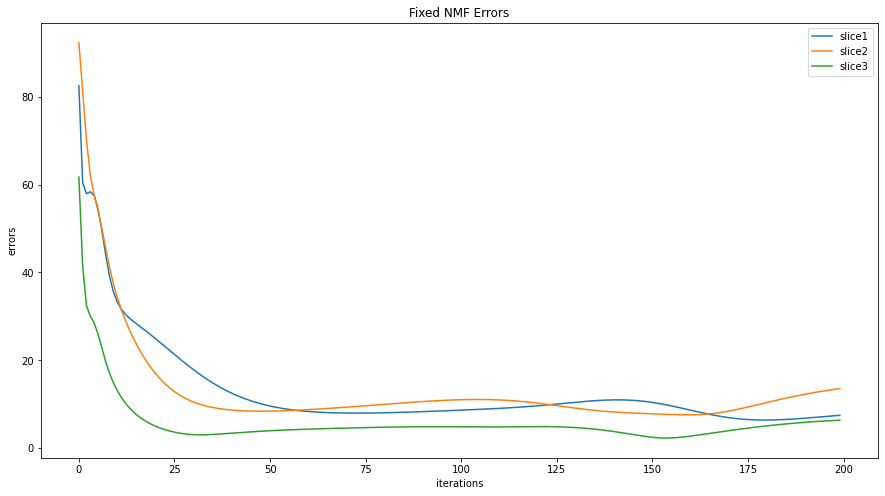

In [12]:
h,wf,e = fixed_NMF(T=tensor_test, rank=7, iters=200, plot_errors=True)

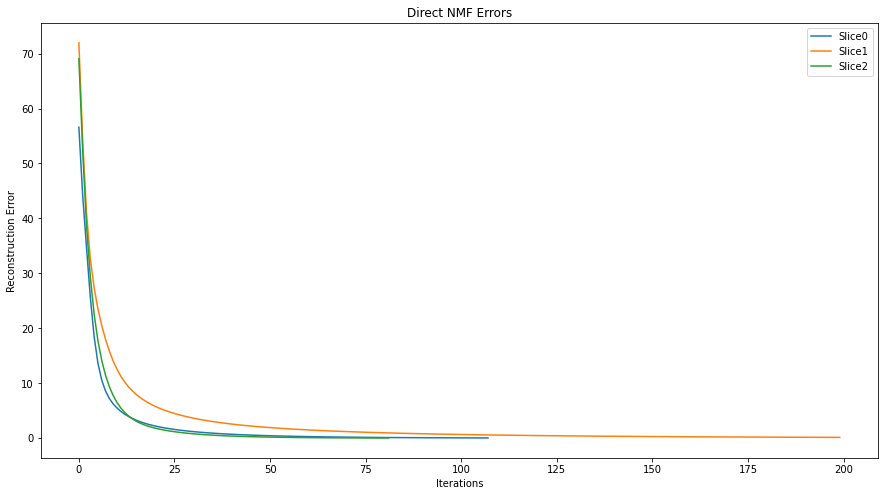

In [13]:
hs,ws = direct_NMF(tensor_test, rank=7, iters=200, tol=1e-3, plot_errors=True)

In [14]:
def reconstruction(H, W, fixed=False):

    if fixed:
        return np.dstack([H@W[0].T, H@W[1].T, H@W[2].T])

    else:
        return np.dstack([H[0]@W[0].T, H[1]@W[1].T, H[2]@W[2].T])


In [17]:
def initialize(tensor, rank, norm=True):

    tensor_shape = tensor.shape

    factors = [np.random.randint(10,20, size=(s,rank)).astype(float) for s in tensor_shape]

    if norm:

        factors = [f / np.linalg.norm(f, axis=0, ord=2) for f in factors]

    return factors


def c_unfold(tensor, mode):
    return np.reshape(np.moveaxis(tensor, mode, 0), (tensor.shape[mode], -1))


def khatri_rao(a,b):

    height = a.shape[0] * b.shape[0]
    width = b.shape[1]

    result = np.empty(shape=(height,width))

    for c in range(a.shape[1]):
        for r in range(a.shape[0]):

            result[r*b.shape[0]:(r+1)*b.shape[0], c] = a[r,c] * b[:, c]

    return result

def to_tensor(factors):

    a,b,c = factors

    shape = (a.shape[0], b.shape[0], c.shape[0])

    b = khatri_rao(a=b, b=c).T

    return (a @ b).reshape(shape)






def nncp(tensor, rank,  norm=True, iters=100, eps=1e-3, plot_errors=True):

    #initialize a matrix for each mode of the tensor
    #shape should be (dimension x rank) for each dimension of the tensor

    factors = initialize(tensor=tensor, rank=rank, norm=norm)

    #number of modes in the tensor
    #Should only be a 3rd order tensor for this demo
    n_modes = len(factors)


    #for storing errors
    errs = []

    # for each mode of the tensor isolate it from the other two 
    # and alternate optimizing it
    # repeat for however many iterations specificed

    for i in range(iters):

        for mode in range(n_modes):

            #get all other modes besides the current
            isolated = [m for m in range(n_modes) if m != mode]

            #calculate and multiply the covariance of the other factor modes together
            for pos, factor_dim in enumerate(isolated):

                if pos:
                    aggregate *= factors[factor_dim].T@factors[factor_dim]
                else:
                    aggregate = factors[factor_dim].T@factors[factor_dim]

            #Pre compute the khatri rao product of the other factors
            kr = khatri_rao(a=factors[isolated[0]], b=factors[isolated[1]])

            #unfold the tensor with respect to the current mode
            unfolded = c_unfold(tensor=tensor, mode=mode)

            #precompute first part of numerator with 0 entry perturbation
            numerator = unfolded @ kr
            numerator[numerator < eps] = eps

            #calculate denominator with 0 entry perturbation
            denominator = factors[mode] @ aggregate
            denominator[denominator<eps] = eps


            #update the currently isolated mode's factors
            factor = factors[mode] * numerator / denominator

            #replace the old factor
            factors[mode] = factor

        
        #reconstruct the tensor from the factors and calculate the error
        reconstruction = to_tensor(factors)
        
        #RMSE
        err = np.sqrt(np.sum((tensor - reconstruction)**2))
        errs.append(err)

    if plot_errors:

        plt.figure(figsize=(15,8))
        plt.plot(range(len(errs)), errs)
        plt.xlabel('iterations')
        plt.ylabel('RMSE')
        plt.title('Reconstruction Error')
        plt.show()

    return factors




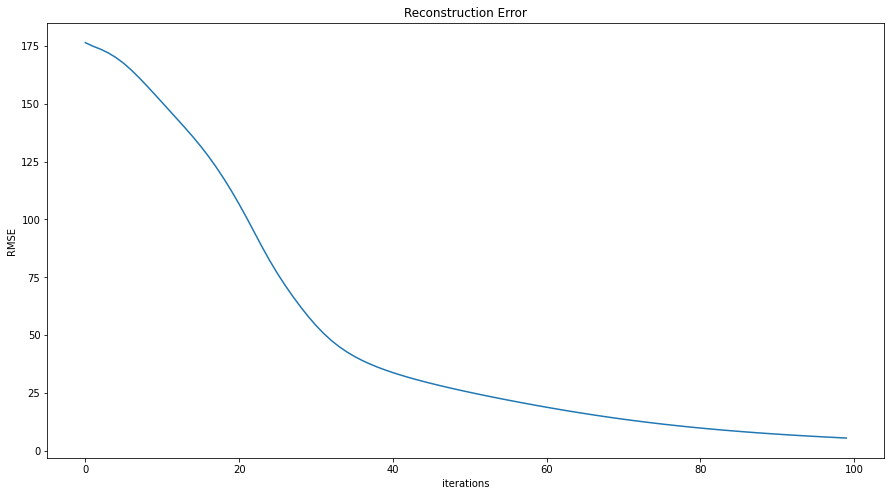

In [28]:
fs = nncp(tensor_test, 10)

http://tensorly.org/stable/_modules/tensorly/random/base.html#random_cp
http://tensorly.org/stable/_modules/tensorly/decomposition/_nn_cp.html#non_negative_parafac
https://www.kolda.net/publication/TensorReview.pdf


# 20 Newsgroup Data Set

https://ndownloader.figshare.com/files/5975967

In [48]:
import os


root = os.path.join(os.path.expanduser('~'), 'Downloads')
data_path = os.path.join(root, os.path.join('20newsbydate', r'20news-bydate-train'))
os.listdir(data_path)

['rec.autos',
 'talk.politics.mideast',
 'comp.graphics',
 'comp.sys.mac.hardware',
 'comp.sys.ibm.pc.hardware',
 'sci.space',
 'talk.religion.misc',
 'sci.electronics',
 'sci.med',
 'rec.sport.baseball',
 'comp.os.ms-windows.misc',
 'alt.atheism',
 'comp.windows.x',
 'rec.sport.hockey',
 'talk.politics.guns',
 'rec.motorcycles',
 'misc.forsale',
 'sci.crypt',
 'talk.politics.misc',
 'soc.religion.christian']

In [738]:
for_sale = os.path.join(data_path, r'misc.forsale')
baseball = os.path.join(data_path, r'rec.sport.baseball')
atheism = os.path.join(data_path, r'alt.atheism')
space = os.path.join(data_path, 'sci.space')

In [751]:
#randomly sample 780 docs from 'for sale' and 'space'
for_sale_sample = np.random.choice(a=os.listdir(for_sale), size=780)

space_sample = np.random.choice(a=os.listdir(space), size=780)


#randomly sample 390 docs from 'atheism' and 'baseball'
atheism_sample = np.random.choice(a=os.listdir(atheism), size=390)

baseball_sample = np.random.choice(a=os.listdir(baseball), size=390)

In [753]:
def construct_data(base_path, files):

    data = np.empty(shape=len(files)).astype('object')

    for pos, file in enumerate(files):

        fp = os.path.join(base_path, file)

        with open(fp, 'rb') as fh:
            data[pos] = fh.read()


    return data

In [754]:
for_sale_data = construct_data(for_sale, for_sale_sample)
baseball_data = construct_data(baseball, baseball_sample)
atheism_data = construct_data(atheism, atheism_sample)
space_data = construct_data(space, space_sample)

In [755]:
import re
      
def remove_headers(s):

    split_on_lines = re.split('lines:\s*\d*', s)
    split_on_org = re.split('organization:\s*\S+\s*\S+', s)
    split_on_writes = re.split('writes:',s)


    if len(split_on_writes)>1:
        return split_on_writes[-1]

    if len(split_on_lines) > 1:
        return split_on_lines[-1]

    if len(split_on_org)>1:
        return split_on_org[-1]

    return s
    

    

    if not body:
        return header
    else:
        return body
 
    return [x for x in s[0] if x][0]

def canonical(s):
    s = s.lower().replace('\n', ' ')
    return s

def alphanumeric(s):

    s = re.findall('[a-zA-Z0-9]+', s)
    return ' '.join(s)


def remove_emails(s):

    return re.sub('\S*@\S*\s?', '', s)

def remove_footer_two_dash(s):
    s= re.split('\-{2}', s)
    print(s)
    return s[0]

def remove_footer_forward_backward_slash(s):
    return re.split(r'(/\\).*', s)[0]

def remove_footer_line(s):
    return re.split(r'______*', s)[0]


In [756]:
def edit(s, topic=None):
    try:
        s = s.decode('utf8')
    except:
        s = s.decode("ISO-8859-1")
    s = canonical(s)
    s = remove_emails(s)
    
    s = remove_headers(s)
    # s = remove_footer_two_dash(s)
    s = remove_footer_forward_backward_slash(s)
    s = remove_footer_line(s)
    s = alphanumeric(s).strip()
    
    return s

In [757]:
edit(for_sale_data[69])

'for sale 1982 16 hobie cat special very good condition with trailer catbox righting system many extras boat is currently garaged in natick ma 25 miles east of boston 1800 contact or call 617 374 8217'

In [762]:
print(baseball_data[389].decode('utf8'))

From: tedward@cs.cornell.edu (Edward [Ted] Fischer)
Subject: Re: Young Catchers
Article-I.D.: cs.1993Apr6.185951.19058
Organization: Cornell Univ. CS Dept, Ithaca NY 14853
Lines: 17

In article <mssC52rIL.8E0@netcom.com> mss@netcom.com (Mark Singer) writes:
> Your speculation (and 
>others) that Lopez will produce better than the two proven veterans
>is nothing more than speculation, no matter how well founded.

Your speculation that the two proven veterans will produce better
than Lopez is also no more than speculation.  It *does* make
a difference whether the speculation is well-founded or not.
  
>Obviously, the Braves believe they can win with the catching they
>have, and I agree.  If they change their minds, they'll call up Lopez.

Though this is a good point.  The one speculation is "safer",
because it can be reversed.

Cheers,
-Valentine



In [760]:
from IPython.display import clear_output


for pos, s in enumerate(baseball_data):
    
    if len(edit(s)) < 10:
        print(pos)
    # clear_output(wait=True)
    # print(edit(s), flush=True)
    # print(pos)
    # time.sleep(0.2)

43


In [704]:
pos

389

In [326]:
print((atheism_data[18].decode('utf8')))

print('\n\n')

print(edit(atheism_data[18]))

From: bobbe@vice.ICO.TEK.COM (Robert Beauchaine)
Subject: Re: After 2000 years, can we say that Christian Morality is
Organization: Tektronix Inc., Beaverton, Or.
Lines: 33

In article <C5L1Ey.Jts@news.cso.uiuc.edu> cobb@alexia.lis.uiuc.edu (Mike Cobb) writes:
>In <11825@vice.ICO.TEK.COM> bobbe@vice.ICO.TEK.COM (Robert Beauchaine) writes:
>
>
>>  Actually, my atheism is based on ignorance.  Ignorance of the
>>  existence of any god.  Don't fall into the "atheists don't believe
>>  because of their pride" mistake.
>
>How do you know it's based on ignorance, couldn't that be wrong? Why would it
>be wrong 
>to fall into the trap that you mentioned? 
>

  If I'm wrong, god is free at any time to correct my mistake.  That
  he continues not to do so, while supposedly proclaiming his
  undying love for my eternal soul, speaks volumes.

  As for the trap, you are not in a position to tell me that I don't
  believe in god because I do not wish to.  Unless you can know my
  motivations better t

In [460]:
print(remove_emails(test.lower()))

from: (robert beauchaine)
subject: re: after 2000 years, can we say that christian morality is
organization: tektronix inc., beaverton, or.
lines: 33

in article (mike cobb) writes:
>in (robert beauchaine) writes:
>
>
>>  actually, my atheism is based on ignorance.  ignorance of the
>>  existence of any god.  don't fall into the "atheists don't believe
>>  because of their pride" mistake.
>
>how do you know it's based on ignorance, couldn't that be wrong? why would it
>be wrong 
>to fall into the trap that you mentioned? 
>

  if i'm wrong, god is free at any time to correct my mistake.  that
  he continues not to do so, while supposedly proclaiming his
  undying love for my eternal soul, speaks volumes.

  as for the trap, you are not in a position to tell me that i don't
  believe in god because i do not wish to.  unless you can know my
  motivations better than i do myself, you should believe me when i
  say that i earnestly searched for god for years and never found
  him.


/\/\/\

In [274]:
print(baseball_data[130].decode('utf8'))

From: traven@pitt.edu (Neal Traven)
Subject: Re: Braves Pitching UpdateDIR
Lines: 22
X-Newsreader: TIN [version 1.1 PL8]

Dave Naehring X2079 P7630 (ep502dn@pts.mot.com) wrote:
: In article 2482@adobe.com, snichols@adobe.com (Sherri Nichols) writes:
: >Every single piece of evidence we can find points to Major League Baseball
: >being 50% offense, 50% defense.  A run scored is just as important as a run
: >prevented.  
: >
: This certainly passes the "common sense test" for me, but is there any
: statistical evidence to say what percent of defense is pitching and what
: percent is fielding?  I'd really like to know.  BTW, Sherri, thanks for 
: the DA data I find it fascinating.

One of the chapters in Palmer and Thorn's 'Hidden Game' is titled
'Pitching is 44% of Baseball,' implying that fielding is 6%.  How do
they determine that?  Beats me -- it's been a long, long time since I
read it.

One also has to separate offense into batting and baserunning, with the
split probably somewhere 

In [292]:
edit(baseball_data[130])

'x newsreader tin version 1 1 pl8 dave naehring x2079 p7630 ep502dn pts mot com wrote in article 2482 adobe com snichols adobe com sherri nichols writes every single piece of evidence we can find points to major league baseball being 50 offense 50 defense a run scored is just as important as a run prevented this certainly passes the common sense test for me but is there any statistical evidence to say what percent of defense is pitching and what percent is fielding i d really like to know btw sherri thanks for the da data i find it fascinating one of the chapters in palmer and thorn s hidden game is titled pitching is 44 of baseball implying that fielding is 6 how do they determine that beats me it s been a long long time since i read it one also has to separate offense into batting and baserunning with the split probably somewhere around 49 5 and 0 5 neal traven pitt edu you re only young once but you can be traven vms cis pitt edu immature forever larry andersen'

In [289]:
remove_headers(canonical(baseball_data[130].decode('utf8')))

'x-newsreader: tin [version 1.1 pl8]  dave naehring x2079 p7630 (ep502dn@pts.mot.com) wrote: : in article 2482@adobe.com, snichols@adobe.com (sherri nichols) writes: : >every single piece of evidence we can find points to major league baseball : >being 50% offense, 50% defense.  a run scored is just as important as a run : >prevented.   : > : this certainly passes the "common sense test" for me, but is there any : statistical evidence to say what percent of defense is pitching and what : percent is fielding?  i\'d really like to know.  btw, sherri, thanks for  : the da data i find it fascinating.  one of the chapters in palmer and thorn\'s \'hidden game\' is titled \'pitching is 44% of baseball,\' implying that fielding is 6%.  how do they determine that?  beats me -- it\'s been a long, long time since i read it.  one also has to separate offense into batting and baserunning, with the split probably somewhere around 49.5% and 0.5%. -- ---------------------------------------------------

In [492]:
test = atheism_data[7].decode('utf')

In [493]:
print(test)

From: pww@spacsun.rice.edu (Peter Walker)
Subject: Re: Rawlins debunks creationism
Organization: I didn't do it, nobody saw me, you can't prove a thing.
Lines: 30

In article <1993Apr15.223844.16453@rambo.atlanta.dg.com>,
wpr@atlanta.dg.com (Bill Rawlins) wrote:
> 
>     We are talking about origins, not merely science.   Science cannot
>     explain origins.  For a person to exclude anything but science from
>     the issue of origins is to say that there is no higher truth
>     than science.  This is a false premise.

Says who? Other than a hear-say god.

>     By the way, I enjoy science.

You sure don't understand it.

>     It is truly a wonder observing God's creation.  Macroevolution is
>     a mixture of 15 percent science and 85 percent religion [guaranteed
>     within three percent error :) ]

Bill, I hereby award you the Golden Shovel Award for the biggist pile of
bullshit I've seen in a whils. I'm afraid there's not a bit of religion in
macroevolution, and you've made a r

In [477]:
re.split(r'(/\\).*', test)[0]

'From: bobbe@vice.ICO.TEK.COM (Robert Beauchaine)\nSubject: Re: After 2000 years, can we say that Christian Morality is\nOrganization: Tektronix Inc., Beaverton, Or.\nLines: 33\n\nIn article <C5L1Ey.Jts@news.cso.uiuc.edu> cobb@alexia.lis.uiuc.edu (Mike Cobb) writes:\n>In <11825@vice.ICO.TEK.COM> bobbe@vice.ICO.TEK.COM (Robert Beauchaine) writes:\n>\n>\n>>  Actually, my atheism is based on ignorance.  Ignorance of the\n>>  existence of any god.  Don\'t fall into the "atheists don\'t believe\n>>  because of their pride" mistake.\n>\n>How do you know it\'s based on ignorance, couldn\'t that be wrong? Why would it\n>be wrong \n>to fall into the trap that you mentioned? \n>\n\n  If I\'m wrong, god is free at any time to correct my mistake.  That\n  he continues not to do so, while supposedly proclaiming his\n  undying love for my eternal soul, speaks volumes.\n\n  As for the trap, you are not in a position to tell me that I don\'t\n  believe in god because I do not wish to.  Unless you can 

In [491]:
re.split('-{2}', test)[0]

"Subject: Re: Bill Conner:\nFrom: kmr4@po.CWRU.edu (Keith M. Ryan)\nOrganization: Case Western Reserve University\nNNTP-Posting-Host: b64635.student.cwru.edu\nLines: 17\n\nIn article <C4y976.MLr@darkside.osrhe.uoknor.edu> bil@okcforum.osrhe.edu (Bill Conner) writes:\n\n>Could you explain what any of this pertains to? Is this a position\n>statement on something or typing practice? And why are you using my\n>name, do you think this relates to anything I've said and if so, what.\n>\n>Bill\n\n Could you explain what any of the above pertains to? Is this a position \nstatement on something or typing practice? \n"